In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, END, START

In [2]:
class AgentState(TypedDict):
    number_1: int
    number_2: int
    operation: str
    final_number: int
    

In [3]:
def add_function (state: AgentState) -> AgentState:
    """Esta funcion suma los 2 numeros ingresados"""
    state["final_number"] =  state["number_1"] + state["number_2"]
    return state

def substract_function (state:AgentState) -> AgentState:
    """Esta funcion resta los 2 numeros ingresados"""
    state["final_number"] = state["number_1"] - state["number_2"]
    return state

def desition_function (state: AgentState) -> AgentState:
    """Esta funcion decide que calculos ejecutar segun la operacion ingresada"""
    print("DESITION:")
    if state["operation"] == "+":
        print("se eligio sumar")
        return "addition_operation"
    elif state["operation"] == "-":
        print("se eligio restar")
        return "substract_operation"
    

In [4]:
graph = StateGraph(AgentState)

#nodes

graph.add_node("add_node",add_function)
graph.add_node("substract_node", substract_function)
graph.add_node("router", lambda state: state)

#edges

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    desition_function,
    {
        "addition_operation" : "add_node",
        "substract_operation" : "substract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()

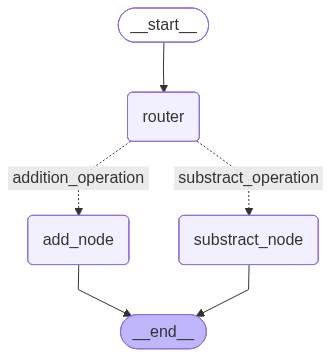

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
input = AgentState(number_1= 30, number_2= 15, operation= "-", final_number= 0)
app.invoke(input)

DESITION:
se eligio restar


{'number_1': 30, 'number_2': 15, 'operation': '-', 'final_number': 15}

In [12]:
input = AgentState(number_1= 30, number_2= 15, operation= "-", final_number= 0)
resultado = app.invoke(input)

DESITION:
se eligio restar


In [15]:
resultado["final_number"]

15